In [46]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.fftpack import dct, idct
from jpeg import JPEG

Q_100 = np.ones((8, 8))
Q_50 = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                [12, 12, 14, 19, 26, 58, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [18, 22, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]])

w, h = 100*8+2, 100*8+2

arr_spatial_raw = np.ones((w, h))*2**7

# Generate heteroscedastic noise
a, b = 10**(-3), 2
arr_spatial_raw = np.random.normal(arr_spatial_raw, a*arr_spatial_raw+b)


# Handle clipping
arr_spatial_raw[arr_spatial_raw<0] = 0
arr_spatial_raw[arr_spatial_raw>(2**8)-1] = (2**8)-1

# Mimick bayer demosaicking
arr_spatial_R, arr_spatial_G, arr_spatial_B = np.array([[0, 0], [0, 1]]), np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 0]])
arr_spatial_R, arr_spatial_G, arr_spatial_B = [ arr_spatial_raw*np.kron(np.ones((w//2, h//2)), m) for m in [arr_spatial_R, arr_spatial_G, arr_spatial_B]]

K_R, K_G, K_B = (1/4)*np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]), \
                (1/4)*np.array([[0, 1, 0], [1, 4, 1], [0, 1, 0]]), \
                (1/4)*np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])

arr_spatial_RGB = np.dstack((scipy.signal.convolve2d(arr_spatial_R, K_R, 'valid'), \
                             scipy.signal.convolve2d(arr_spatial_G, K_G, 'valid'), \
                             scipy.signal.convolve2d(arr_spatial_B, K_B, 'valid'))).astype(int)

In [47]:
jpeg_file_simple_compression = JPEG(arr_spatial_RGB).toBlocksView()\
                                .DCT()\
                                .Quantize(Q_100)\
                                .output()

jpeg_file_double_compression = JPEG(arr_spatial_RGB).toBlocksView()\
                                .DCT()\
                                .Quantize(Q_100)\
                                .Dequantize(Q_100)\
                                .IDCT()\
                                .DCT()\
                                .Quantize(Q_X)\
                                .output()

In [57]:
X = jpeg_file_simple_compression[:, :, :, :, 0].reshape(jpeg_file_simple_compression.shape[0]*jpeg_file_simple_compression.shape[1], 64)
Y= jpeg_file_double_compression[:, :, :, :, 0].reshape(jpeg_file_double_compression.shape[0]*jpeg_file_double_compression.shape[1], 64)

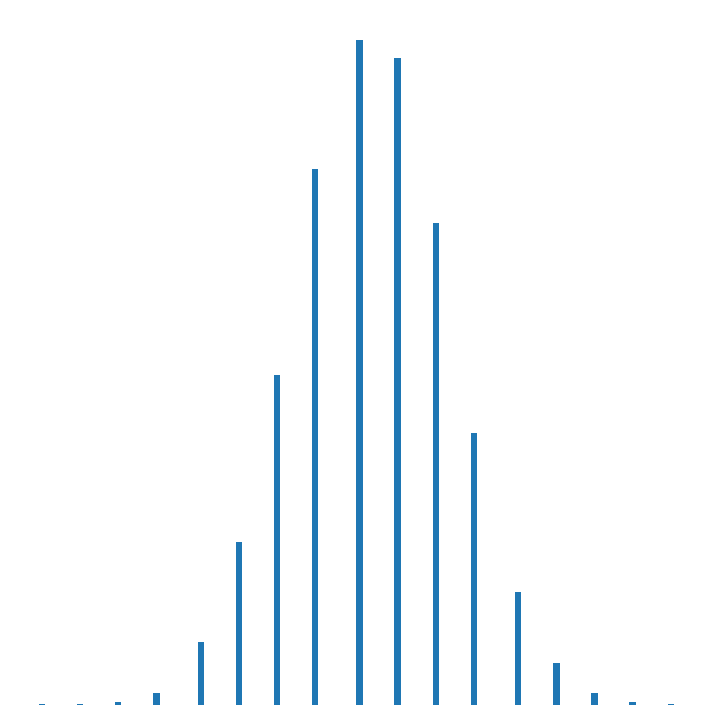

In [61]:
fig, axs = plt.subplots(figsize = (10, 10), nrows = 1, ncols = 1, sharey=True, tight_layout=True)

i = 0
axs.hist(Y[:, i], bins=100)
axs.axis('off')
plt.show()

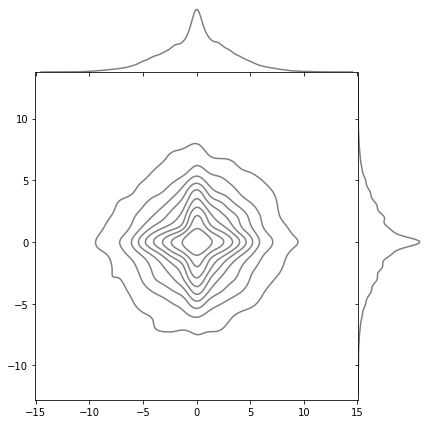

In [60]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
 
# No space
sns.jointplot(x=X[:, 1], y=X[:, 2], kind='kde', color="grey", space=0)

plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.fftpack import dct, idct
from jpeg import JPEG


A = np.array([[52, 55, 61, 66, 70, 61, 64, 73],
            [63, 59, 55, 90, 109, 85, 69, 72],
            [62, 59, 68, 113, 144, 104, 66, 73],
            [63, 58, 71, 122, 154, 106, 70, 69],
            [67, 61, 68, 104, 126, 88, 68, 70],
            [79, 65, 60, 70, 77, 68, 58, 75],
            [85, 71, 64, 59, 55, 61, 65, 83],
            [87, 79, 69, 68, 65, 76, 78, 94]])


Q_100 = np.ones((8, 8))
Q_50 = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                [12, 12, 14, 19, 26, 58, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [18, 22, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]])

In [2]:
np.set_printoptions(suppress=True) #Avoid scientific printing
jpeg_file_simple_compression = JPEG(A).toBlocksView()\
                                .DCT()\
                                .Quantize(Q_50).Round()\
                                .Dequantize(Q_50).Round()\
                                .IDCT().Round().toStandardView()\
                                .output()

B = jpeg_file_simple_compression.reshape((8, 8))
print(B)

[[ 54  56  53  65  78  63  56  80]
 [ 60  58  58  83 105  83  60  72]
 [ 64  58  66 109 142 110  68  68]
 [ 63  58  70 119 154 119  72  69]
 [ 65  61  66  99 125  97  64  71]
 [ 72  70  61  68  82  67  56  74]
 [ 79  82  65  54  63  62  64  85]
 [ 81  90  73  57  67  74  79  97]]


In [3]:
print(B)

[[ 54  56  53  65  78  63  56  80]
 [ 60  58  58  83 105  83  60  72]
 [ 64  58  66 109 142 110  68  68]
 [ 63  58  70 119 154 119  72  69]
 [ 65  61  66  99 125  97  64  71]
 [ 72  70  61  68  82  67  56  74]
 [ 79  82  65  54  63  62  64  85]
 [ 81  90  73  57  67  74  79  97]]
